In [6]:
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import pandas as pd
from scipy.interpolate import CubicSpline
from statsmodels.graphics.mosaicplot import mosaic
import plot_likert
from statsmodels.stats.proportion import proportion_confint
from scipy.stats import binomtest
from statsmodels.stats.proportion import proportions_ztest
sns.set()

plt.rc('figure', figsize=(10, 6))
plt.rc('font', size=12)

# Raport 1

**Nazwa kursu:** Analiza danych ankietowych

**Prowadzący:** dr Rafał Połoczański

**Autorzy:** Antczak Jakub (268745), Curkowicz Kinga (268774)

**Rok akademicki:** 2023/2024

## Spis treści

1. [Wstęp](#Wstęp)
2. [Część I](#Część-I)
    - [Zadanie 1](#Zadanie-1)
    - [Zadanie 2](#Zadanie-2)
    - [Zadanie 3](#Zadanie-3)
    - [Zadanie 4](#Zadanie-4)
    - [Zadanie 5](#Zadanie-5)
    - [Zadanie 6](#Zadanie-6)
    - [Zadanie 7](#Zadanie-7)
    - [Zadanie 8](#Zadanie-8)
3. [Część II](#Część-II)
    - [Zadanie 2](#Zadanie-2-cz2)
    - [Zadanie 3](#Zadanie-3)
    - [Zadanie 4](#Zadanie-4)
    - [Zadanie 5](#Zadanie-5)
4. [Część III i IV](#Część-III-IV)
    - [Zadanie 6](#Zadanie-6)
    - [Zadanie 7](#Zadanie-7)
    - [Zadanie 8](#Zadanie-8)
    - [Zadanie 9](#Zadanie-9)
5. [Część V](#Część-V)
    - [Zadanie 10](#Zadanie-10)
    - [Zadanie 11](#Zadanie-11)
    - [Zadanie 12](#Zadanie-12)
6. [Zadanie dodatkowe](#Zadanie-dodatkowe)



## Wstęp <a id="Wstęp"></a>

Raport ma na celu analizę danych pewnej dużej agencji reklamowej. W agencji przeprowadzono ocenę poziomu satysfakcji z pracy. Wzięło w niej udział dwieście losowo wybranych osób.

## Część I <a name="Część-I"></a>

### Zadanie 1

In [2]:
df = pd.read_csv('ankieta.csv', sep=';', encoding='unicode_escape')
df.rename(columns={'DZIA£': 'DZIAŁ', 'STA¯': 'STAŻ', 'P£EÆ': 'PŁEĆ'}, inplace=True)
df.head()

,DZIAŁ,STAŻ,CZY_KIER,PYT_1,PYT_2,PYT_3,PŁEĆ,WIEK
0,IT,2,Nie,1,-2,1,M,64
1,IT,2,Nie,0,-2,-2,M,67
2,IT,2,Nie,1,2,2,M,65
3,IT,2,Nie,-1,-2,-2,K,68
4,IT,3,Tak,1,2,-1,K,65


In [3]:
df.isna().sum()

DZIAŁ       0
STAŻ        0
CZY_KIER    0
PYT_1       0
PYT_2       0
PYT_3       0
PŁEĆ        0
WIEK        0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DZIAŁ     200 non-null    object
 1   STAŻ      200 non-null    int64 
 2   CZY_KIER  200 non-null    object
 3   PYT_1     200 non-null    int64 
 4   PYT_2     200 non-null    int64 
 5   PYT_3     200 non-null    int64 
 6   PŁEĆ      200 non-null    object
 7   WIEK      200 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 12.6+ KB


W powyższym zadaniu przygotowaliśmy dane do analizy. Wczytaliśmy dane z pliku `ankieta.csv`, a następnie sprawdziliśmy za pomocą funkcji $\texttt{isna().sum()}$ czy dane zawierają braki typu NaN. Sprawdziliśmy również za pomocą funkcji $\texttt{info()}$ typy danych w poszczególnych kolumnach.

Widzimy, że w danych nie ma braków, a typy danych w poszczególnych kolumnach są zgodne z oczekiwaniami.

### Zadanie 2

In [3]:
df['WIEK_KAT'] = pd.cut(df['WIEK'], bins=[0, 35, 45, 55, 100], labels=['do 35 lat', '36-45', '46-55', 'powyzej 55'])
df

,DZIAŁ,STAŻ,CZY_KIER,PYT_1,PYT_2,PYT_3,PŁEĆ,WIEK,WIEK_KAT
0,IT,2,Nie,1,-2,1,M,64,powyzej 55
1,IT,2,Nie,0,-2,-2,M,67,powyzej 55
2,IT,2,Nie,1,2,2,M,65,powyzej 55
3,IT,2,Nie,-1,-2,-2,K,68,powyzej 55
4,IT,3,Tak,1,2,-1,K,65,powyzej 55
...,...,...,...,...,...,...,...,...,...
195,HR,2,Nie,1,2,2,M,42,36-45
196,HR,2,Nie,1,-1,-1,K,35,do 35 lat
197,HR,2,Nie,-1,-2,-2,K,39,36-45
198,HR,2,Nie,1,2,1,K,48,46-55


### Zadanie 3

In [6]:
df['DZIAŁ'].value_counts()
df_dzial = df['DZIAŁ'].value_counts().reset_index()
df_dzial.rename(columns={'count': 'Liczność'}, inplace=True)
df_dzial

,DZIAŁ,Liczność
0,DK,98
1,DS,45
2,HR,31
3,IT,26


In [7]:
df['STAŻ'].value_counts()

STAŻ
2    140
1     41
3     19
Name: count, dtype: int64

In [8]:
df['CZY_KIER'].value_counts()

CZY_KIER
Nie    173
Tak     27
Name: count, dtype: int64

In [9]:
df['PŁEĆ'].value_counts()

PŁEĆ
M    129
K     71
Name: count, dtype: int64

In [10]:
df['WIEK_KAT'].value_counts()

WIEK_KAT
36-45         104
46-55          45
do 35 lat      26
powyzej 55     25
Name: count, dtype: int64

Widzimy, że:
- najwięcej osób z próbki ($98$) pracuje w Dziale Kreatywnym. Najmniej osób pracuje w Dziale IT ($26$),
- najwięcej osób z próbki ($140$) pracuje w firmie pomiędzy $1$ a $3$ latami,
- tylko $27$ osób z próbki zajmuje stanowisko kierownicze,
- $129$ osób z próbki to mężczyźni
- najwięcej $104$ pracowników z próbki jest w kategorii wiekowej $36-45$ lat.



### Zadanie 4

Text(0, 0.5, 'Liczność')

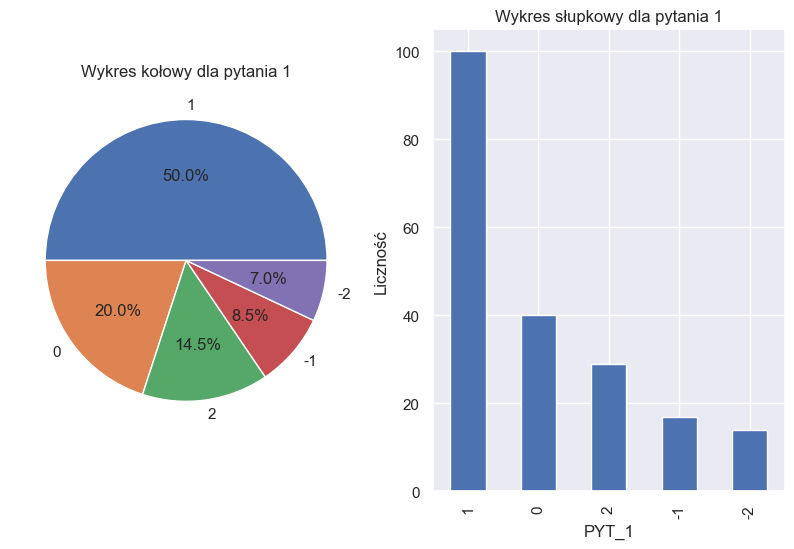

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2)
df['PYT_1'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0])
df['PYT_1'].value_counts().plot(kind='bar', ax=ax[1])
ax[0].set_title('Wykres kołowy dla pytania 1')
ax[1].set_title('Wykres słupkowy dla pytania 1')
ax[0].set_ylabel('')
ax[1].set_ylabel('Liczność')

Text(0, 0.5, 'Liczność')

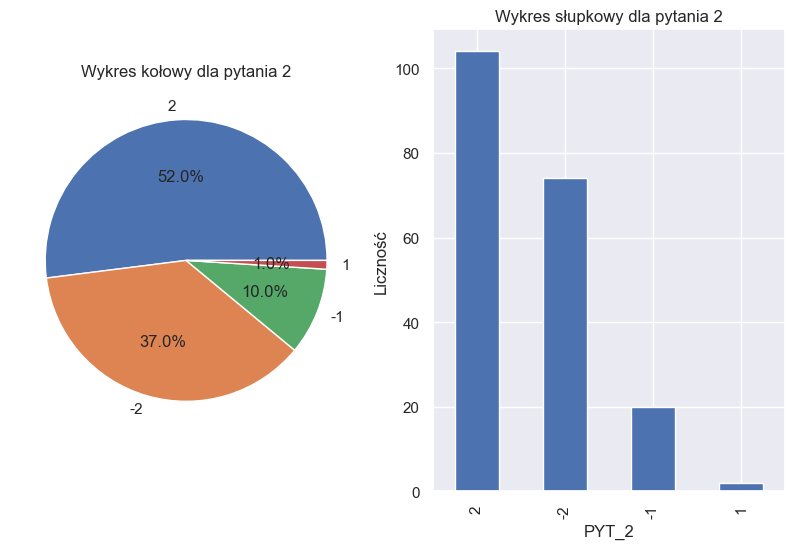

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2)
df['PYT_2'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0])
df['PYT_2'].value_counts().plot(kind='bar', ax=ax[1])
ax[0].set_title('Wykres kołowy dla pytania 2')
ax[1].set_title('Wykres słupkowy dla pytania 2')
ax[0].set_ylabel('')
ax[1].set_ylabel('Liczność')

Widzimy, że:
- $50\%$ osób z próbki zgadza się ($1$) ze stwierdzeniem, że firm apozwala na elastyczne godziny pracy,
- $52\%$ osób z próbki zdecydowanie się zgadza ze stwierdzeniem, że ich wynagrodzenie jest adekwatne do wykonywanej pracy.

### Zadanie 5

In [13]:
pd.crosstab(df['PYT_1'], df['DZIAŁ'], margins=True)

DZIAŁ,DK,DS,HR,IT,All
PYT_1,,,,,
-2,9,3,2,0,14
-1,10,3,2,2,17
0,17,14,5,4,40
1,51,15,19,15,100
2,11,10,3,5,29
All,98,45,31,26,200


In [14]:
pd.crosstab(df['PYT_1'], df['STAŻ'], margins=True)

STAŻ,1,2,3,All
PYT_1,,,,
-2,5,5,4,14
-1,6,10,1,17
0,8,26,6,40
1,19,75,6,100
2,3,24,2,29
All,41,140,19,200


In [15]:
pd.crosstab(df['PYT_1'], df['CZY_KIER'], margins=True)

CZY_KIER,Nie,Tak,All
PYT_1,,,
-2,10,4,14
-1,14,3,17
0,34,6,40
1,88,12,100
2,27,2,29
All,173,27,200


In [16]:
pd.crosstab(df['PYT_1'], df['PŁEĆ'], margins=True)

PŁEĆ,K,M,All
PYT_1,,,
-2,3,11,14
-1,7,10,17
0,14,26,40
1,36,64,100
2,11,18,29
All,71,129,200


In [17]:
pd.crosstab(df['PYT_1'], df['WIEK_KAT'], margins=True)

WIEK_KAT,do 35 lat,36-45,46-55,powyzej 55,All
PYT_1,,,,,
-2,1,11,2,0,14
-1,6,7,1,3,17
0,3,24,5,8,40
1,13,50,25,12,100
2,3,12,12,2,29
All,26,104,45,25,200


### Zadanie 6

In [18]:
pd.crosstab(df['PYT_2'], df['PYT_3'], margins=True)

PYT_3,-2,-1,1,2,All
PYT_2,,,,,
-2,49,16,5,4,74
-1,3,6,10,1,20
1,0,0,2,0,2
2,0,8,15,81,104
All,52,30,32,86,200


### Zadanie 7

W zadaniu 7 zakładamy, że pytanie brzmi: *czy jesteś zadowolony ze swoich zarobków?*. Możliwe odpowiedzi to wyłącznie **TAK** lub **NIE**.

In [4]:
df['CZY_ZADOW'] = df['PYT_2'].map({2: 'TAK', 1: 'TAK', -1: 'NIE', -2: 'NIE'})
df

,DZIAŁ,STAŻ,CZY_KIER,PYT_1,PYT_2,PYT_3,PŁEĆ,WIEK,WIEK_KAT,CZY_ZADOW
0,IT,2,Nie,1,-2,1,M,64,powyzej 55,NIE
1,IT,2,Nie,0,-2,-2,M,67,powyzej 55,NIE
2,IT,2,Nie,1,2,2,M,65,powyzej 55,TAK
3,IT,2,Nie,-1,-2,-2,K,68,powyzej 55,NIE
4,IT,3,Tak,1,2,-1,K,65,powyzej 55,TAK
...,...,...,...,...,...,...,...,...,...,...
195,HR,2,Nie,1,2,2,M,42,36-45,TAK
196,HR,2,Nie,1,-1,-1,K,35,do 35 lat,NIE
197,HR,2,Nie,-1,-2,-2,K,39,36-45,NIE
198,HR,2,Nie,1,2,1,K,48,46-55,TAK


### Zadanie 8

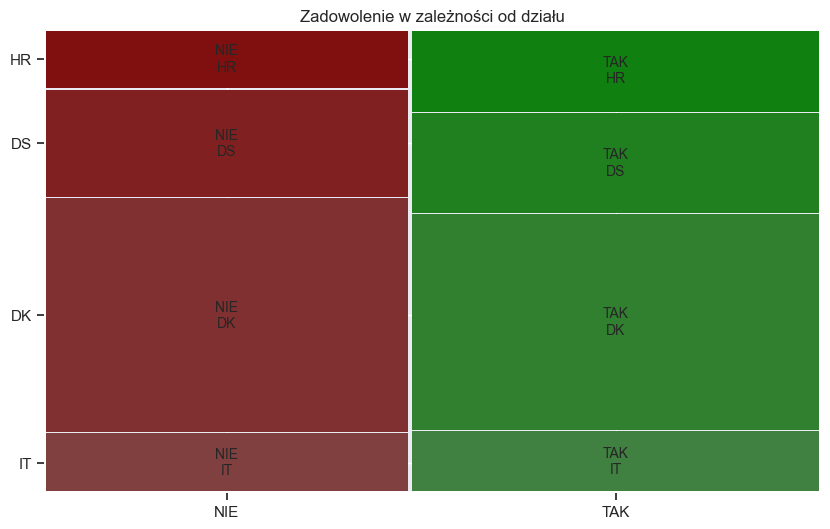

In [20]:
mosaic(df, ['CZY_ZADOW', 'DZIAŁ'], title="Zadowolenie w zależności od działu");

Widzimy, że:

- najwięcej procent osób, która jest zadowolna ze swojego wynagrodzenia jest z działu DK,
- najwięcej procent osób, które nie są zadowolone ze swojego wynagrodzenia jest z również z działu DK.

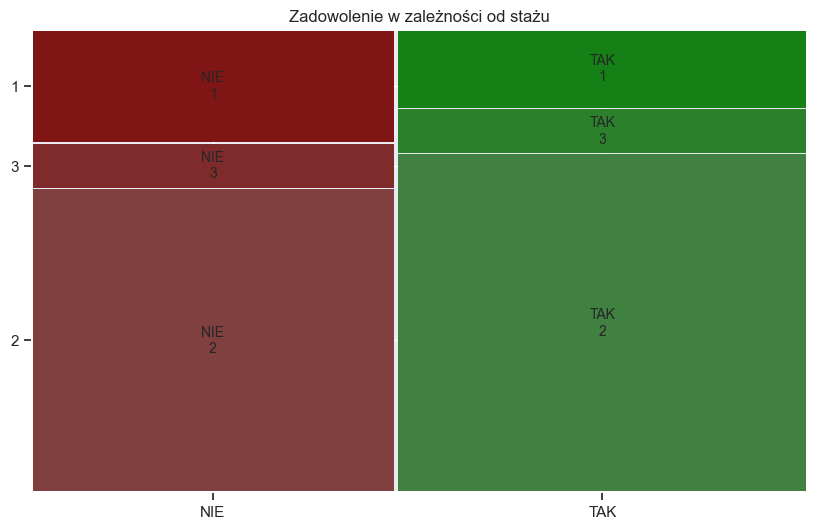

In [21]:
mosaic(df, ['CZY_ZADOW', 'STAŻ'], title="Zadowolenie w zależności od stażu");

Możemy zauważyć, że:
- najwięcej osób, które są zadowolone ze swojego wynagrodzenia pracują w firmie 2 lata,
- najwięcej osób, które nie są zadowolone ze swojego wynagrodzenia pracują w firmie również 2 lata.

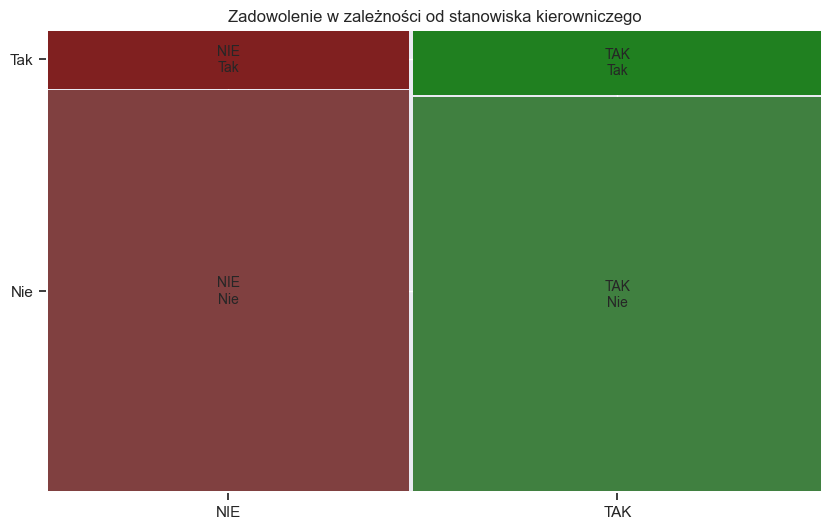

In [22]:
mosaic(df, ['CZY_ZADOW', 'CZY_KIER'], title="Zadowolenie w zależności od stanowiska kierowniczego");

Widzimy, że:
- najwięcej osób, które są zadowolone ze swojego wynagrodzenia nie zajmują stanowisk kierowniczych,
- najwięcej osób, które nie są zadowolone ze swojego wynagrodzenia również nie zajmują stanowisk kierowniczych.

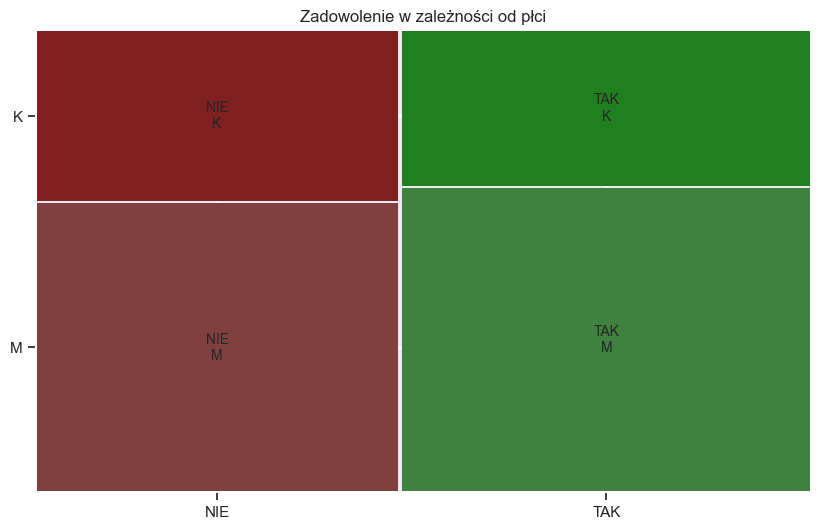

In [23]:
mosaic(df, ['CZY_ZADOW', 'PŁEĆ'], title="Zadowolenie w zależności od płci");

Widzimy, że:
- najwięcej osób, które są zadowolone ze swojego wynagrodzenia to męźczyźni,
- najwięcej osób, które nie są zadowolone ze swojego wynagrodzenia to również mężczyźni.

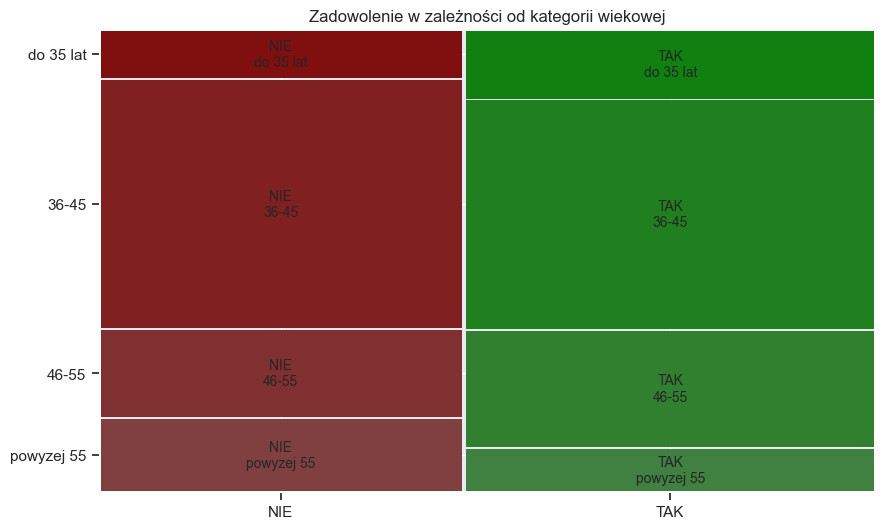

In [24]:
mosaic(df, ['CZY_ZADOW', 'WIEK_KAT'], title="Zadowolenie w zależności od kategorii wiekowej");

Zobaczmy również, że:
- najwięcej osób, które są zadowolone ze swojego wynagrodzenia to osoby w wieku 36-45 lat,
- najwięcej osób, które nie są zadowolone ze swojego wynagrodzenia to również osoby w wieku 36-45 lat.

## Część II <a name="Część-II"></a>

### Zadanie 2 <a name="Zadanie-2-cz2"></a>

W tym zadaniu na początku zilustrujemy odpowiedzi na pytanie *Jak bardzo zgadzasz się ze stwierdzeniem, że firma pozwala na elastyczne godziny pracy tym samym umożliwiając zachowanie równowagi między pracą a życiem prywatnym?* w całej badanej grupie. Możliwe odpowiedzi to:

- `-2`  zdecydowanie się nie zgadzam,
- `-1`  nie zgadzam się,
-  `0`  nie mam zdania,
-  `1`  zgadzam się,
-  `2`  zdecydowanie się zgadzam.

c:\Users\jakub\AppData\Local\Programs\Python\Python311\Lib\site-packages\plot_likert\plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)


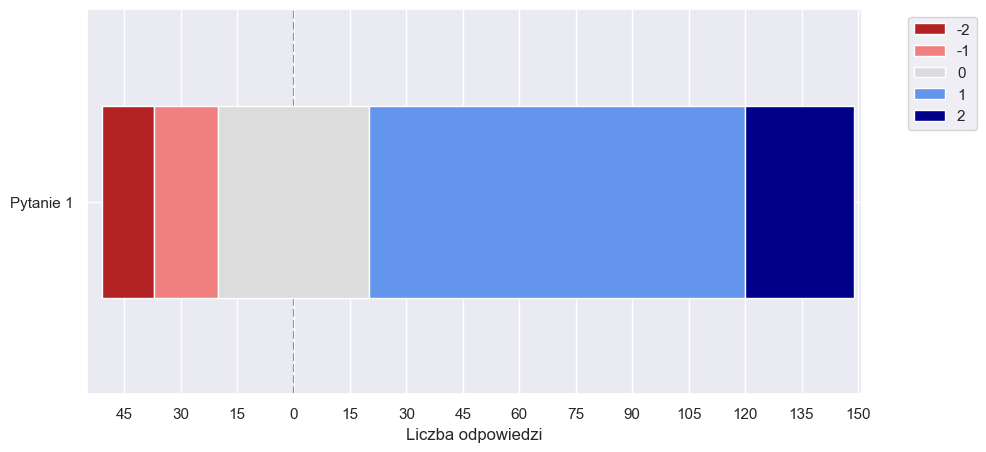

In [59]:
scale = ['-2','-1','0','1','2']
ax=plot_likert.plot_likert(pd.DataFrame(df['PYT_1']).astype(str), scale)
ax.figure.set_size_inches(10, 5)
ax.set_yticklabels(['Pytanie 1'])
ax.set_xlabel('Liczba odpowiedzi');

Na podstawie wykresu możemy stwierdzić, że najwięcej odpowiedzi znajduje się w kategorii ($1$), a prawie ($1/4$) badanej grupy nie ma zdania na ten temat. 

Sprawdźmy dokładną ilość odpowiedzi w danych kategoriach.

In [66]:
df_pyt1 = df['PYT_1'].value_counts().reset_index()
df_pyt1.rename(columns={'PYT_1': 'Odpowiedzi', 'count': 'Liczność'}, inplace=True)
df_pyt1

,Odpowiedzi,Liczność
0,1,100
1,0,40
2,2,29
3,-1,17
4,-2,14


Widzimy, że:
- najwięcej odpowiedzi znajduje się w kategorii 1, co stanowi równo połowę odpowiedzi osób z badanej próbki liczącej ($200$),
- uzyskaliśmy łącznie ($129$) pozytywnych odpowiedzi na pytanie
- $40$ osób z próbki nie ma zdania na ten temat,
- otrzymaliśmy w sumie ($31$) negatywnych odpowiedzi na pytanie
- najmniejsza ilość osób ($14$) wybrała odpowiedż *zdecydowanie się nie zgadzam*

Zaprezentujuemy teraz te wyniki za histogramie oraz wykresie gęstości.

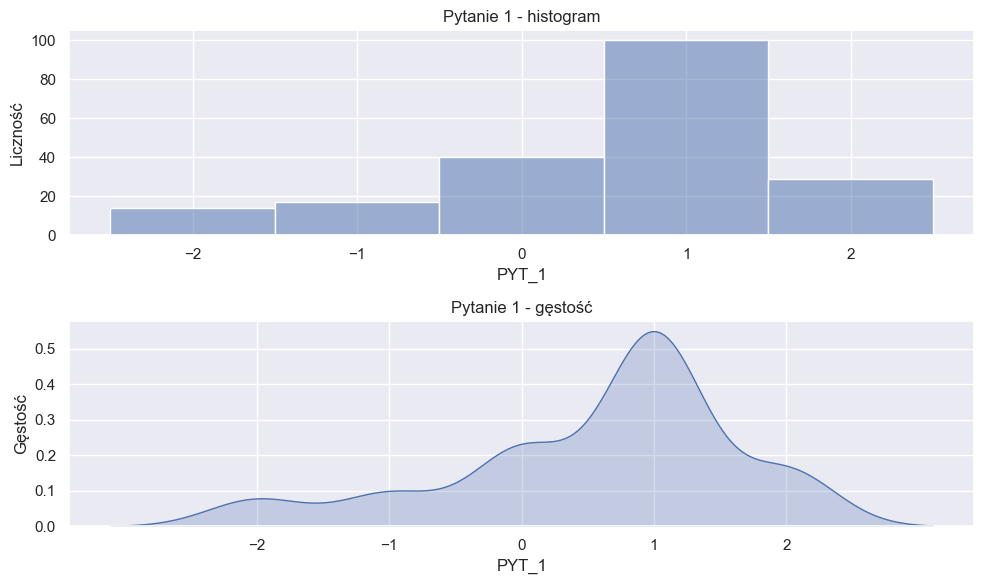

In [70]:
fig, axs = plt.subplots(2, 1)

sns.histplot(df['PYT_1'], bins=5, discrete=True, alpha=0.5, ax=axs[0]);
axs[0].set_xlabel('PYT_1')
axs[0].set_ylabel('Liczność')
axs[0].set_title('Pytanie 1 - histogram')

sns.kdeplot(df['PYT_1'], fill=True, ax=axs[1]);
axs[1].set_xticks([-2, -1, 0, 1, 2])
axs[1].set_xlabel('PYT_1')
axs[1].set_ylabel('Gęstość')
axs[1].set_title('Pytanie 1 - gęstość')

plt.tight_layout();

Zilustrujemy teraz odpowiedzi na powyższe pytanie w podgrupach ze względu na zmienną **CZY_KIER**. Na początku skupimy się na odpowiedziach osób zajmujących stanowiska menadżerskie. 

**(CZY_KIER - Tak)**

In [11]:
df_kier_tak= df[df['CZY_KIER'] == 'Tak']

c:\Users\jakub\AppData\Local\Programs\Python\Python311\Lib\site-packages\plot_likert\plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)


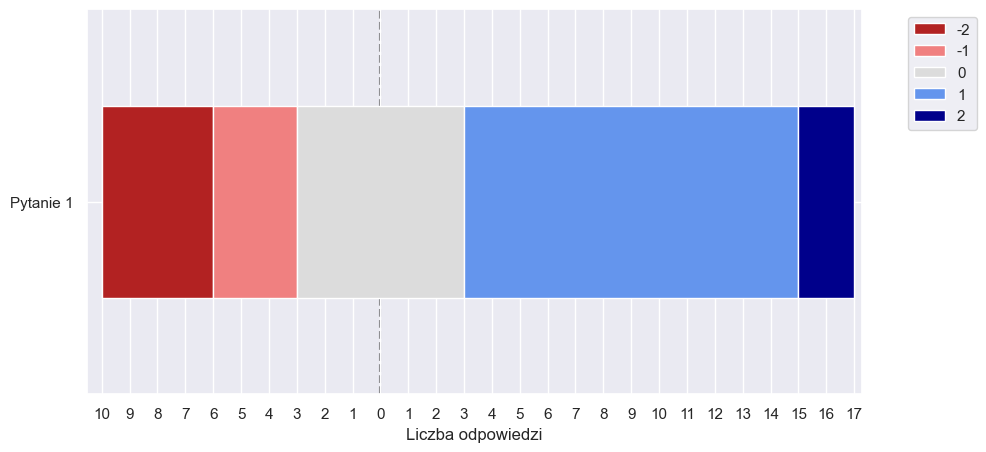

In [72]:
scale = ['-2','-1','0','1','2']
ax=plot_likert.plot_likert(pd.DataFrame(df_kier_tak['PYT_1']).astype(str), scale)
ax.figure.set_size_inches(10, 5)
ax.set_yticklabels(['Pytanie 1'])
ax.set_xlabel('Liczba odpowiedzi');

Ponownie możemy zauważyć, że najwięcej odpowiedzi znajduje się w kategorii ($1$) oraz spora część grupy nie ma zdania na ten temat. 
Ponownie popatrzmy na dokładne wyniki.

In [9]:
df_kier_tak_pyt1 = df_kier_tak['PYT_1'].value_counts().reset_index()
df_kier_tak_pyt1.rename(columns={'PYT_1': 'Odpowiedzi', 'count': 'Liczność'}, inplace=True)
df_kier_tak_pyt1

,Odpowiedzi,Liczność
0,1,12
1,0,6
2,-2,4
3,-1,3
4,2,2


Możemy zauważyć, że:
- na stanowiskach kierowniczych znajduje się 27 osób.
- najwięcej odpowiedzi znajduje się w kategorii 1 - *zgadzam się*
- uzyskaliśmy łącznie $14$ pozytywnych odpowiedzi na pytanie, co stanowi ponad $50$% odpowiedzi w grupie kierowników
- $6$ osób z próbki nie ma zdania na ten temat,
- otrzymaliśmy w sumie $7$ negatywnych odpowiedzi na pytanie
- najmniejsza ilość osób ($2$) wybrała odpowiedż *zdecydowanie się zgadzam*

Przedstawiamy teraz wyniki za pomocą różnych typów wykresów.

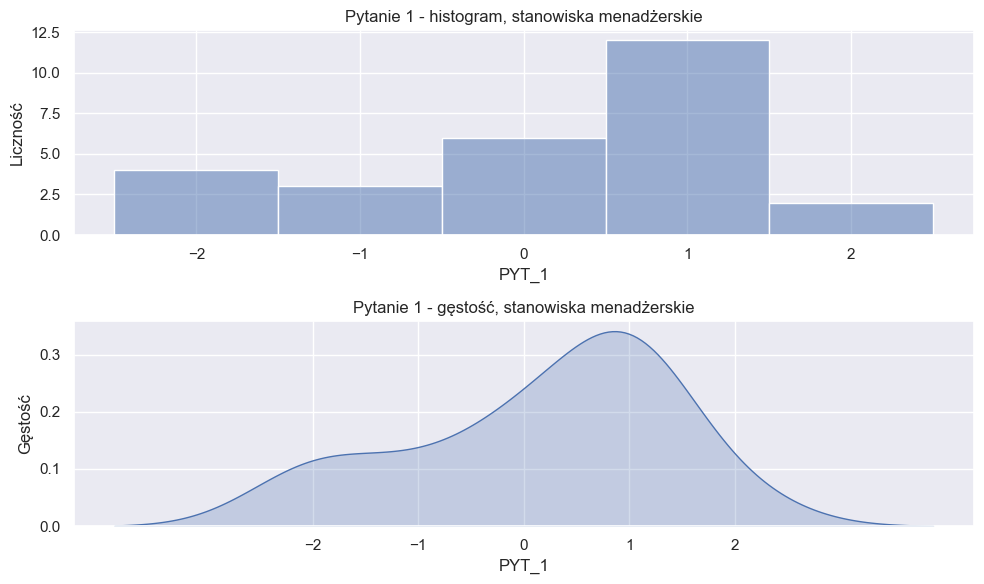

In [11]:
fig, axs = plt.subplots(2, 1)

sns.histplot(df_kier_tak['PYT_1'], bins=5, discrete=True, alpha=0.5, ax=axs[0]);
axs[0].set_xlabel('PYT_1')
axs[0].set_ylabel('Liczność')
axs[0].set_title('Pytanie 1 - histogram, stanowiska menadżerskie')

sns.kdeplot(df_kier_tak['PYT_1'], fill=True, ax=axs[1]);
axs[1].set_xticks([-2, -1, 0, 1, 2])
axs[1].set_xlabel('PYT_1')
axs[1].set_ylabel('Gęstość')
axs[1].set_title('Pytanie 1 - gęstość, stanowiska menadżerskie')

plt.tight_layout();

Przejdziemy teraz do wizualizacji odpowiedzi osób, które nie zajmują stanowisk menadżerskich. 

**(CZY_KIER - Nie)**

In [7]:
df_kier_nie= df[df['CZY_KIER'] == 'Nie']

c:\Users\jakub\AppData\Local\Programs\Python\Python311\Lib\site-packages\plot_likert\plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)


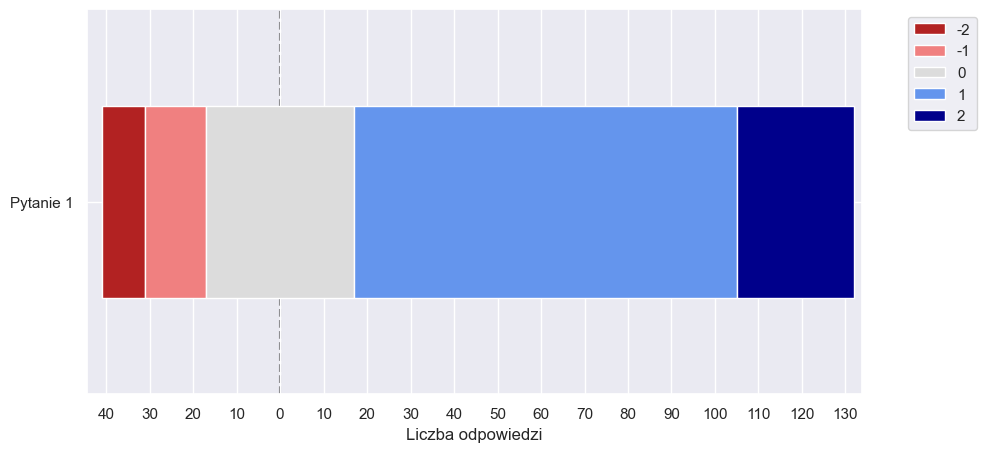

In [13]:
scale = ['-2','-1','0','1','2']
ax=plot_likert.plot_likert(pd.DataFrame(df_kier_nie['PYT_1']).astype(str), scale)
ax.figure.set_size_inches(10, 5)
ax.set_yticklabels(['Pytanie 1'])
ax.set_xlabel('Liczba odpowiedzi');

Po raz trzeci otrzymujemy, że najwięcej odpowiedzi znajduje się w kategorii ($1$) oraz druga w kolejności najliczniejsza grupa wstrzymała się od konkretnej odpowiedzi i wybrała opcję `0` - nie mam zdania. Zwróćmy uwagę po raz kolejny na dokładne liczby.

In [8]:
df_kier_nie_pyt1 = df_kier_nie['PYT_1'].value_counts().reset_index()
df_kier_nie_pyt1.rename(columns={'PYT_1': 'Odpowiedzi', 'count': 'Liczność'}, inplace=True)
df_kier_nie_pyt1

,Odpowiedzi,Liczność
0,1,88
1,0,34
2,2,27
3,-1,14
4,-2,10


Zuważamy, że:
- na stanowiskach niemenadżerskich znajdują się 173 osoby.
- najwięcej odpowiedzi ($88$) znajduje się w kategorii 1 - *zgadzam się*
- uzyskaliśmy łącznie $115$ pozytywnych odpowiedzi na pytanie, co stanowi ponad $50$% odpowiedzi w grupie kierowników
- $34$ osób z próbki nie ma zdania na ten temat,
- otrzymaliśmy w sumie $24$ negatywnych odpowiedzi na pytanie
- najmniejsza ilość osób ($2$) wybrała odpowiedż *zdecydowanie się nie zgadzam*

Zaprezentujemy wyniki ponownie na innych rodzajach wykresów.

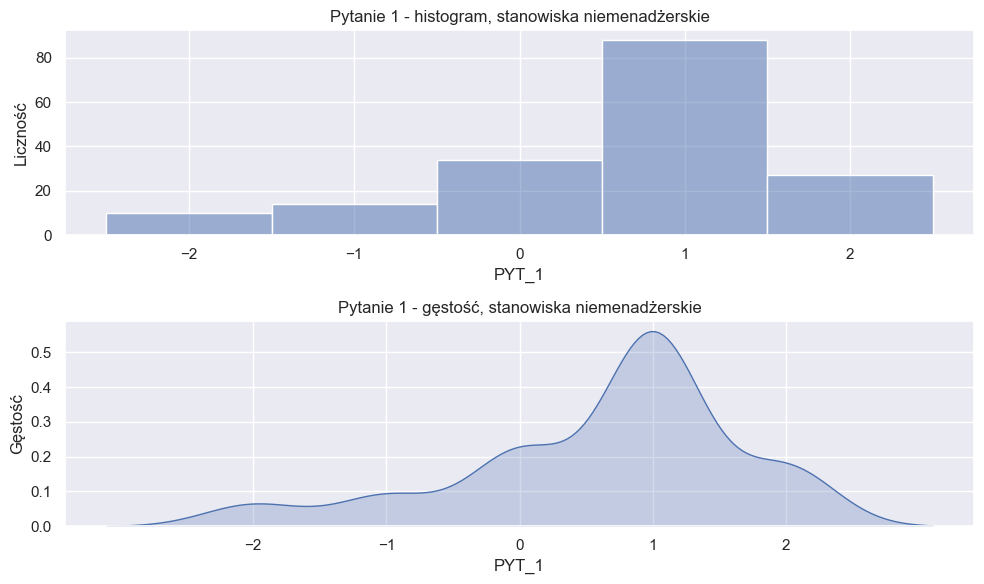

In [9]:
fig, axs = plt.subplots(2, 1)

sns.histplot(df_kier_nie['PYT_1'], bins=5, discrete=True, alpha=0.5, ax=axs[0]);
axs[0].set_xlabel('PYT_1')
axs[0].set_ylabel('Liczność')
axs[0].set_title('Pytanie 1 - histogram, stanowiska niemenadżerskie')

sns.kdeplot(df_kier_nie['PYT_1'], fill=True, ax=axs[1]);
axs[1].set_xticks([-2, -1, 0, 1, 2])
axs[1].set_xlabel('PYT_1')
axs[1].set_ylabel('Gęstość')
axs[1].set_title('Pytanie 1 - gęstość, stanowiska niemenadżerskie')

plt.tight_layout();

Na samym końcu prezentujemy porównianie histogramów i gęstości dla Zadania 2.

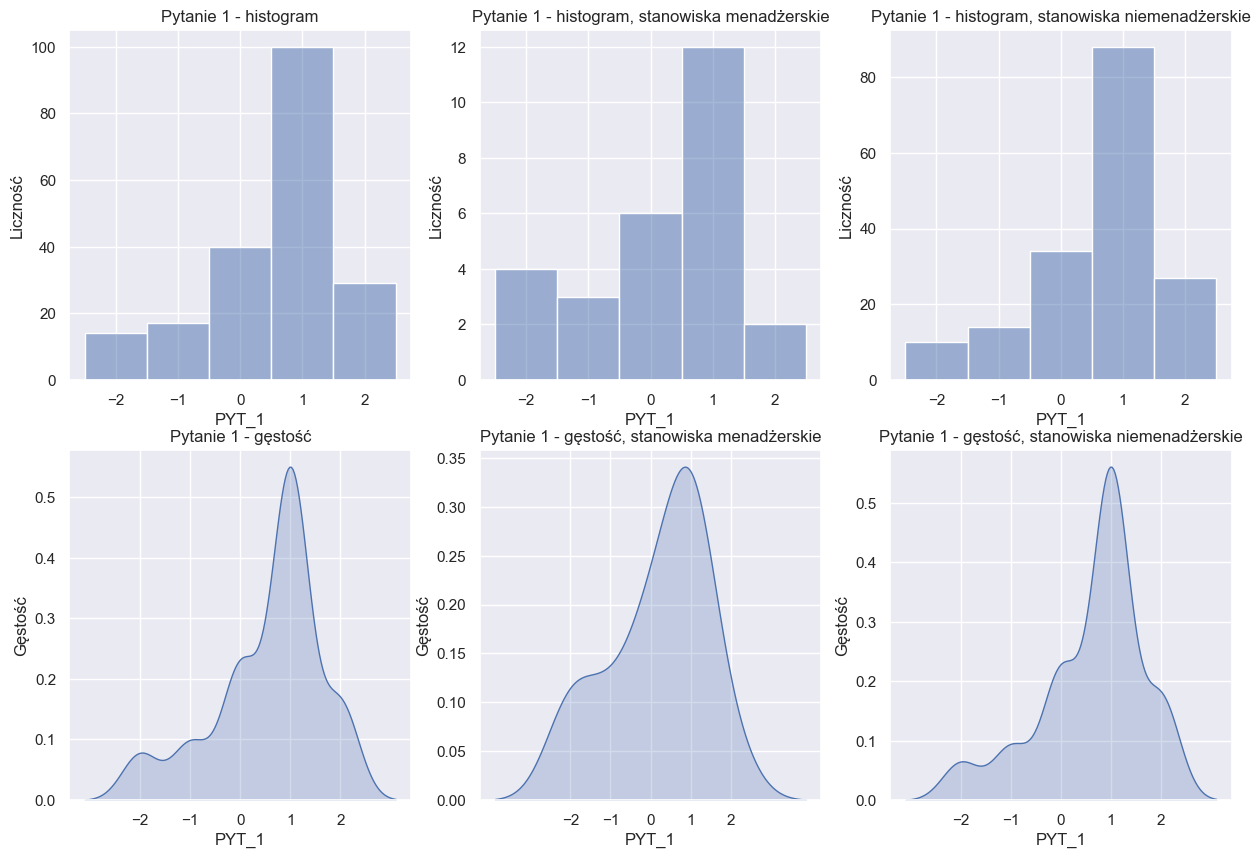

In [14]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
sns.histplot(df['PYT_1'], bins=5, discrete=True, alpha=0.5, ax=ax[0,0]);
ax[0,0].set_ylabel('Liczność')
ax[0,0].set_title('Pytanie 1 - histogram')

sns.histplot(df_kier_tak['PYT_1'], bins=5, discrete=True, alpha=0.5, ax=ax[0,1]);
ax[0,1].set_ylabel('Liczność')
ax[0,1].set_title('Pytanie 1 - histogram, stanowiska menadżerskie')

sns.histplot(df_kier_nie['PYT_1'], bins=5, discrete=True, alpha=0.5, ax=ax[0,2]);
ax[0,2].set_ylabel('Liczność')
ax[0,2].set_title('Pytanie 1 - histogram, stanowiska niemenadżerskie')

sns.kdeplot(df['PYT_1'], fill=True, ax=ax[1,0]);
ax[1,0].set_xticks([-2, -1, 0, 1, 2])
ax[1,0].set_ylabel('Gęstość')
ax[1,0].set_title('Pytanie 1 - gęstość')

sns.kdeplot(df_kier_tak['PYT_1'], fill=True, ax=ax[1,1]);
ax[1,1].set_xticks([-2, -1, 0, 1, 2])
ax[1,1].set_ylabel('Gęstość')
ax[1,1].set_title('Pytanie 1 - gęstość, stanowiska menadżerskie')

sns.kdeplot(df_kier_nie['PYT_1'], fill=True, ax=ax[1,2]);
ax[1,2].set_xticks([-2, -1, 0, 1, 2])
ax[1,2].set_ylabel('Gęstość')
ax[1,2].set_title('Pytanie 1 - gęstość, stanowiska niemenadżerskie');


**Wnioski:**

Na pytanie:

*Jak bardzo zgadzasz się ze stwierdzeniem, że firma pozwala na elastyczne godziny pracy tym samym umożliwiając zachowanie równowagi między pracą a życiem prywatnym?* 

w całej badanej grupie jak i w podgrupach z podziałem na stanowiska menadżerskie i niemenadżerskie wygrała z decydującą przewagą odpowiedź `1` - *zgadzam się*, zatem możemy stwierdzić, że ranga posady nie ma znaczącego wpływu na wyniki ankiety.

### Zadanie 3

W tym zadaniu wylosujemy próbkę liczącą 10% całej próbki w dwóch wersjach: ze zwracaniem oraz bez zwracania.

In [15]:
with_=df.sample(frac=0.1, replace=True)
with_

,DZIAŁ,STAŻ,CZY_KIER,PYT_1,PYT_2,PYT_3,PŁEĆ,WIEK,WIEK_KAT,CZY_ZADOW
101,DK,2,Nie,1,-1,1,K,43,36-45,NIE
33,DK,1,Nie,-1,-2,-2,M,25,do 35 lat,NIE
152,DS,2,Nie,1,-1,-1,M,65,powyzej 55,NIE
124,DS,2,Nie,1,2,2,K,40,36-45,TAK
81,DK,3,Tak,-1,-2,-2,M,54,46-55,NIE
135,DS,2,Nie,-2,-2,2,K,42,36-45,NIE
2,IT,2,Nie,1,2,2,M,65,powyzej 55,TAK
90,DK,2,Nie,1,2,2,M,36,36-45,TAK
156,DS,2,Nie,1,2,2,M,49,46-55,TAK
117,DK,2,Tak,1,2,2,M,37,36-45,TAK


W wersji pierwszej otrzymaliśmy dane ze zwracaniem z wykorzystaniem funkcji sample z parametrem `replace=True`, zatem elementy mogą być wybierane wielokrotnie.

In [16]:
without=df.sample(frac=0.1, replace=False)
without

,DZIAŁ,STAŻ,CZY_KIER,PYT_1,PYT_2,PYT_3,PŁEĆ,WIEK,WIEK_KAT,CZY_ZADOW
108,DK,2,Nie,0,-2,-2,K,43,36-45,NIE
131,DS,3,Tak,0,-2,-2,K,42,36-45,NIE
148,DS,1,Nie,0,-2,-1,M,42,36-45,NIE
141,DS,2,Nie,-1,-2,-1,K,30,do 35 lat,NIE
73,DK,2,Nie,2,2,2,K,44,36-45,TAK
142,DS,2,Nie,1,-1,1,K,52,46-55,NIE
196,HR,2,Nie,1,-1,-1,K,35,do 35 lat,NIE
103,DK,3,Tak,1,2,2,K,36,36-45,TAK
53,DK,1,Nie,0,-2,-2,M,41,36-45,NIE
179,HR,2,Nie,0,-2,-1,M,44,36-45,NIE


W wersji drugiej otrzymaliśmy dane bez zwracania ponownie korzystając z funkcji sample z parametrem `replace=False`, zatem elementy nie mogą się powtarzać.

### Zadanie 4

W zadaniu 4 symulujemy zmienne losowe z rozkładu dwumianowego, a następnie porównujemy wybrane teoretyczne i empiryczne charakterystyki dla przykładowych wartości paramertów rozkładu: *n* i *p*.

In [17]:
def binomial_sample(n, p):
    """
    Generuje próbkę z rozkładu dwumianowego.

    Funkcja symuluje proces n prób Bernoulliego z prawdopodobieństwem sukcesu p. Wynikiem jest liczba
    sukcesów w tych próbach. Każda próba jest niezależna i ma takie samo prawdopodobieństwo sukcesu.

    Parametry:
    - n (int): liczba prób, które mają być przeprowadzone.
    - p (float): prawdopodobieństwo sukcesu w jednej próbie.

    Zwraca:
    - int: liczba sukcesów uzyskanych w n próbach.
    """
    successes = 0
    for _ in range(n):
        rand_num = np.random.random()
        if rand_num < p:
            successes += 1
    return successes

Metoda symulacji zmiennych losowych z rozkładu dwumianowego polega na przeprowadzeniu określonej liczby niezależnych prób  i zliczeniu ilości sukcesów, gdzie sukces w każdej próbie występuje z ustalonym prawdopodobieństwem p. W każdej próbie generowana jest liczba losowa z przedziału od 0 do 1, a sukces jest rejestrowany, jeśli ta liczba jest mniejsza od p. Całkowita liczba sukcesów po wykonaniu wszystkich prób daje wynik symulacji zmiennej losowej z rozkładu dwumianowego.

In [18]:
sample=[binomial_sample(100, 0.5) for _ in range(1000)]

Wybraliśmy n równe $100$, a $p$ równe $0.5$, gdzie $n$ reprezentuje liczbę prób w rozkładzie dwumianowym, a $p$ to prawdopodobieństwo sukcesu w każdej próbie. Zaprezentujemy teraz odpowiednie histogramy i gęstości na poniższych wykresach.

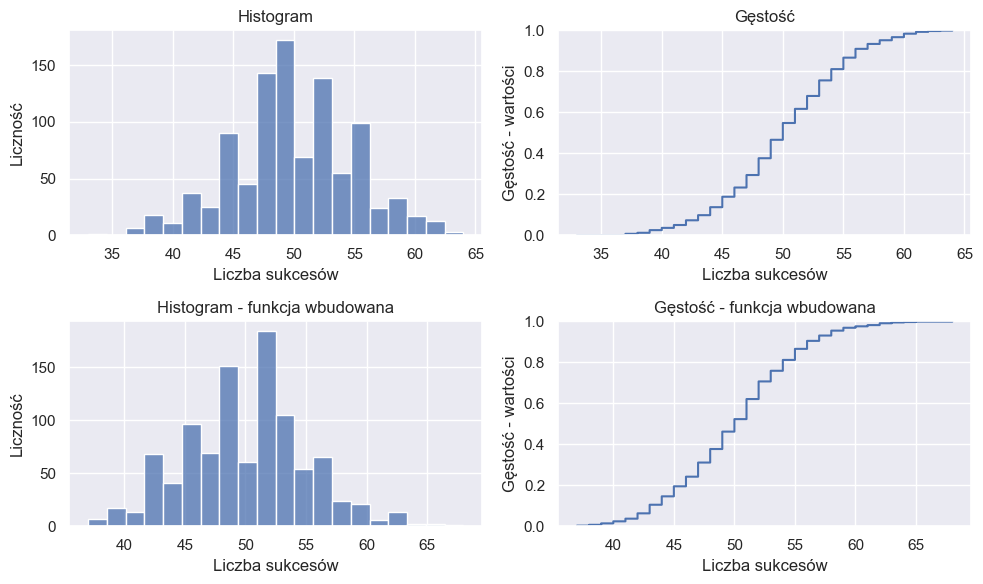

In [19]:
fig, ax = plt.subplots(figsize=(10, 6), nrows=2, ncols=2)

sns.histplot(sample, bins=20, ax=ax[0, 0]) 
ax[0, 0].set_xlabel('Liczba sukcesów')
ax[0, 0].set_ylabel('Liczność')
ax[0, 0].set_title('Histogram')

sns.ecdfplot(sample, ax=ax[0, 1])
ax[0, 1].set_xlabel('Liczba sukcesów')
ax[0, 1].set_ylabel('Gęstość - wartości')
ax[0, 1].set_title('Gęstość')

sample2 = np.random.binomial(100, 0.5, 1000)

sns.histplot(sample2, bins=20, ax=ax[1, 0]) 
ax[1, 0].set_xlabel('Liczba sukcesów')
ax[1, 0].set_ylabel('Liczność')
ax[1, 0].set_title('Histogram - funkcja wbudowana')

sns.ecdfplot(sample2, ax=ax[1, 1])
ax[1, 1].set_xlabel('Liczba sukcesów')
ax[1, 1].set_ylabel('Gęstość - wartości')
ax[1, 1].set_title('Gęstość - funkcja wbudowana')

plt.tight_layout()
plt.show()

Wartości empiryczne dla średniej i wariancji dla zaproponowanej funkcji:

In [42]:
np.mean(sample), np.var(sample)

(50.096, 24.350784)

Wartości teoretyczne dla średniej i wariancji z rozkładu dwumianowego $B(n,p)$ to:
$$\mathrm{E}X=np$$
$$\mathrm{Var}X=np(1-p)$$ 
czyli dla $B(100,0.5)$ powinniśmy otrzymać:
$$\mathrm{E}X=50$$
$$\mathrm{Var}X=25$$
co jest zbliżone do naszych wyników.

Wartości empiryczne dla średniej i wariancji dla wbudowanej funkcji:

In [43]:
np.mean(sample2), np.var(sample2)

(49.872, 24.911616)

### Zadanie 5

In [21]:
sample_multinomial=np.random.multinomial(1000, [0.2, 0.3, 0.5], 1000)

Symulacja wektorów losowych z rozkładu wielomianowego została wykonana za pomocą funkcji np.random.multinomial z biblioteki NumPy. Metoda ta polega na losowaniu prób z rozkładu, który określa prawdopodobieństwo uzyskania różnych kombinacji sukcesów w serii eksperymentów. W przykładzie podanym, wykonano $1000$ eksperymentów z próbą zawierającą $1000$ niezależnych prób. Prawdopodobieństwa sukcesów dla trzech możliwych kategorii wynoszą odpowiednio $0.2$, $0.3$ i $0.5$. 

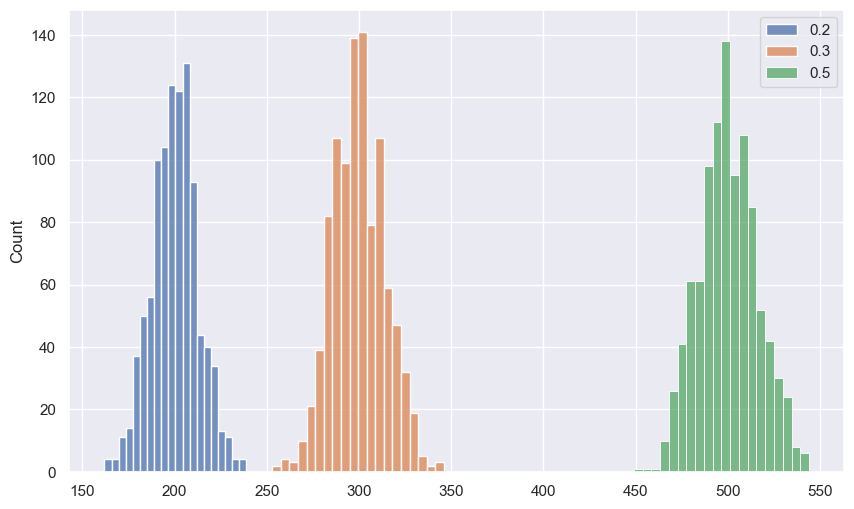

In [22]:
sns.histplot(sample_multinomial[:,0], bins=20, label='0.2')
sns.histplot(sample_multinomial[:,1], bins=20, label='0.3')
sns.histplot(sample_multinomial[:,2], bins=20, label='0.5')
plt.legend();

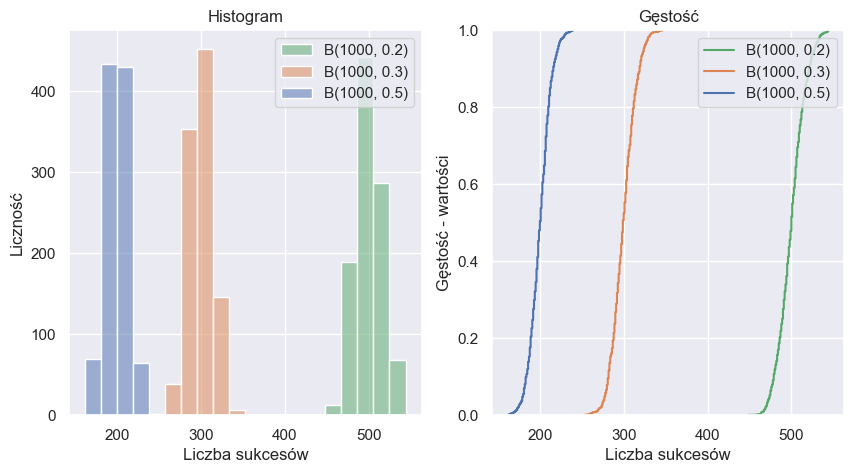

In [23]:
ax, fig = plt.subplots(figsize=(10, 5), nrows=1, ncols=2)
sns.histplot(sample_multinomial, bins=20, ax=fig[0])
fig[0].set_xlabel('Liczba sukcesów')
fig[0].set_ylabel('Liczność')
fig[0].set_title('Histogram')
fig[0].set_label('Liczba sukcesów')
fig[0].legend(['B(1000, 0.2)','B(1000, 0.3)', 'B(1000, 0.5)'])

sns.ecdfplot(sample_multinomial, ax=fig[1])
fig[1].set_xlabel('Liczba sukcesów')
fig[1].set_ylabel('Gęstość - wartości')
fig[1].set_title('Gęstość')
fig[1].legend(['B(1000, 0.2)','B(1000, 0.3)', 'B(1000, 0.5)']);

In [47]:
np.mean(sample_multinomial, axis=0), np.var(sample_multinomial, axis=0)

(array([199.332, 299.832, 500.836]),
 array([181.145776, 223.355776, 268.113104]))

Dla wektorów losowych z rozkładu wielomianowego mamy:
$$\mathrm{E}(X_i)=np_i$$
$$\mathrm{Var}(X_i)=np_i(1-p_i)$$
a więc dla wektora $(X_1,X_2,X_3)$, gdzie $X_1 \sim \mathrm{B}(1000,0.2)$, $X_2 \sim \mathrm{B}(1000,0.3)$, $X_3 \sim \mathrm{B}(1000,0.5)$, powinny wynosić odpowiednio:

$$\mathrm{E}(X_1)=200$$
$$\mathrm{E}(X_2)=300$$
$$\mathrm{E}(X_3)=500$$
a wariancje:
$$\mathrm{Var}(X_1)=160$$
$$\mathrm{Var}(X_2)=210$$
$$\mathrm{Var}(X_3)=250$$

co się zgadza.

## Część III i IV

### Zadanie 6

W zadaniu 6 zaimplementowaliśmy funkcję `clopper_pearson`. Służy nam ona do wyznaczania przedziału ufności Cloppera-Pearsona dla danej liczby sukcesów i prób lub dla określonego poziomu ufności i wektora danych. Wykorzystuje ona rozkład beta do obliczenia granic przedziału ufności, uwzględniając poziom ufności jako argument opcjonalny. Ostatecznie zwraca ona krotkę zawierającą dolną i górną granicę przedziału ufności.

In [24]:
def clopper_pearson(successes, trials, confidence_level=0.95):
    """
    Oblicza przedział ufności dla proporcji metodą Clopper-Pearson.

    Metoda Clopper-Pearson jest metodą dokładną do obliczania przedziałów ufności dla proporcji,
    opartą na rozkładzie beta. Jest zalecana, gdy próbka jest mała, a obserwowane prawdopodobieństwo
    sukcesu jest bliskie 0 lub 1.

    Parametry:
    - successes (int): liczba sukcesów w próbach.
    - trials (int): całkowita liczba prób.
    - confidence_level (float, opcjonalnie): poziom ufności dla przedziału, domyślnie 0.95 (95%).

    Zwraca:
    - tuple: krotka zawierająca dolną i górną granicę przedziału ufności dla obserwowanej proporcji.
    """

    lower_bound = scipy.stats.beta.ppf((1 - confidence_level) / 2, successes, trials - successes + 1)
    upper_bound = scipy.stats.beta.ppf(1 - (1 - confidence_level) / 2, successes + 1, trials - successes)
    
    lower_bound = max(0, lower_bound) if not np.isnan(lower_bound) else 0
    upper_bound = min(1, upper_bound) if not np.isnan(upper_bound) else 1
    
    return (lower_bound, upper_bound)

In [25]:
clopper_pearson(10, 100, 0.95)

(0.04900468922148595, 0.1762225977400227)

### Zadanie 7

W zadaniu 7, aby wyznaczyć realizacje przedziałów ufności dla prawdopodobieństwa, że pracownik jest zadowolony z wynagrodzenia w dwóch badanych okresach, będziemy korzystać z dwóch zmiennych: **CZY_ZADOW** i **CZY_ZADOW_2**. Załóżmy, że zmienne przyjmują wartości $2$ lub $1$, gdy pracownik jest zadowolony z wynagrodzenia w odpowiednio pierwszym i drugim badanym okresie, oraz -$1$, $-2$ w przeciwnym przypadku.

In [5]:
df['CZY_ZADOW2'] = df['PYT_3'].map({2: 'TAK', 1: 'TAK', -1: 'NIE', -2: 'NIE'})
df

,DZIAŁ,STAŻ,CZY_KIER,PYT_1,PYT_2,PYT_3,PŁEĆ,WIEK,WIEK_KAT,CZY_ZADOW,CZY_ZADOW2
0,IT,2,Nie,1,-2,1,M,64,powyzej 55,NIE,TAK
1,IT,2,Nie,0,-2,-2,M,67,powyzej 55,NIE,NIE
2,IT,2,Nie,1,2,2,M,65,powyzej 55,TAK,TAK
3,IT,2,Nie,-1,-2,-2,K,68,powyzej 55,NIE,NIE
4,IT,3,Tak,1,2,-1,K,65,powyzej 55,TAK,NIE
...,...,...,...,...,...,...,...,...,...,...,...
195,HR,2,Nie,1,2,2,M,42,36-45,TAK,TAK
196,HR,2,Nie,1,-1,-1,K,35,do 35 lat,NIE,NIE
197,HR,2,Nie,-1,-2,-2,K,39,36-45,NIE,NIE
198,HR,2,Nie,1,2,1,K,48,46-55,TAK,TAK


In [30]:
trials=200
successes1 = df['CZY_ZADOW'].value_counts()['TAK']
successes2 = df['CZY_ZADW_2'].value_counts()['TAK']

Do wyznaczenia realizacje przedziałów ufności skorzystamy z funkcji napisanej w zadaniu 6.

In [31]:
int1=clopper_pearson(successes1, trials, 0.95)
int2=clopper_pearson(successes2, trials, 0.95)

In [32]:
int1

(0.45833050041147494, 0.6007670588028855)

In [33]:
int2

(0.5184215852127789, 0.6588693543285322)

Otrzymaliśmy przedziały ufności odpowiednio dla zmiennych **CZY_ZADOW** i **CZY_ZADOW_2**.

### Zadanie 8

Zapoznaliśmy się.

### Zadanie 9

W tym zadaniu przeprowadzono symulacje, których celem jest porównanie prawdopodobieństwa z pokrycia i długości przedziałów ufności Cloppera-Pearsona, Walda i  Wilsona. Poziom ufności na ustalony poziomie $0.95$, a rozmiary próby $n \in \{30,100,1000\}$ oraz różne wartości prawdopodobieństwa p z przedziału $[0, 1]$.

In [34]:
def intervals(n, p, conf_level=0.95, method='clopper-pearson'):
    """
    Symuluje obliczanie przedziałów ufności dla proporcji binomowej przy użyciu różnych metod.

    Funkcja generuje przedziały ufności dla danej liczby sukcesów w n próbach, bazując na proporcji p.
    Używa określonej metody do obliczenia tych przedziałów i ocenia ich pokrycie (czyli proporcję przedziałów,
    które rzeczywiście zawierają prawdziwy parametr p).

    Parametry:
    - n (int): liczba prób.
    - p (float): prawdopodobieństwo sukcesu w każdej próbie.
    - conf_level (float, opcjonalnie): poziom ufności dla przedziałów, domyślnie 0.95 (95%).
    - method (str, opcjonalnie): metoda używana do obliczania przedziałów ufności. Domyślnie 'clopper-pearson',
      dostępne opcje to 'clopper-pearson', 'wald' oraz 'wilson'.

    Zwraca:
    - tuple: krotka zawierająca średnie dolne granice przedziałów, średnie górne granice przedziałów oraz
      średnie pokrycie przedziałów.
    """
    successes = np.random.binomial(n, p, size=1000)
    lower_bounds = []
    upper_bounds = []
    coverage = []
    
    for success in successes:
        if method == 'clopper-pearson':
            ci = proportion_confint(success, n, alpha=1-conf_level, method='beta')
        elif method == 'wald':
            p_hat = success / n
            z = scipy.stats.norm.ppf((1 + conf_level) / 2)
            half_width = z * np.sqrt(p_hat * (1 - p_hat) / n)
            ci = (p_hat - half_width, p_hat + half_width)
        elif method == 'wilson':
            ci = proportion_confint(success, n, alpha=1-conf_level, method='wilson')
        lower_bounds.append(ci[0])
        upper_bounds.append(ci[1])
        coverage.append(ci[0] <= p <= ci[1])
    return np.mean(lower_bounds), np.mean(upper_bounds), np.mean(coverage)

In [35]:
def simulation(n_sizes, p_values, methods, conf_level=0.95):
    """
    Symuluje obliczanie przedziałów ufności dla różnych metod i parametrów prób.

    Funkcja przeprowadza symulacje, aby obliczyć przedziały ufności dla różnych rozmiarów prób,
    wartości prawdopodobieństwa sukcesu oraz metod obliczania przedziałów. Dla każdego zestawu
    parametrów obliczany jest przedział ufności, jego długość oraz pokrycie (czyli jak często
    prawdziwa wartość p zawiera się w przedziale).

    Parametry:
    - n_sizes (list[int]): lista rozmiarów prób do symulacji.
    - p_values (array): zakres wartości prawdopodobieństwa sukcesu do symulacji.
    - methods (list[str]): lista metod obliczania przedziałów ufności.
    - conf_level (float, opcjonalnie): poziom ufności do obliczenia przedziałów.
      Domyślnie jest ustawiony na 0.95 (95%).

    Zwraca:
    - list[dict]: lista słowników, gdzie każdy słownik zawiera informacje o wynikach dla
      jednego zestawu parametrów, takie jak rozmiar próby (`n`), prawdopodobieństwo (`p`),
      użyta metoda (`Metoda`), pokrycie (`Pokrycie`) oraz długość przedziału (`Długość`).
      """

    results = []
    for n in n_sizes:
        for p in p_values:
            for method in methods:
                lower, upper, coverage = intervals(n, p, conf_level=conf_level, method=method)
                length = upper - lower
                results.append({'n': n, 'p': p, 'Metoda': method, 'Pokrycie': coverage, 'Długość': length})
    return results

n_sizes = [30, 100, 1000]
p_values = np.arange(0.05, 1, 0.05)
methods = ['clopper-pearson', 'wald', 'wilson']

results = simulation(n_sizes, p_values, methods)
results_df = pd.DataFrame(results)

In [36]:
results_df

,n,p,Metoda,Pokrycie,Długość
0,30,0.05,clopper-pearson,0.979,0.184944
1,30,0.05,wald,0.775,0.130288
2,30,0.05,wilson,0.938,0.172596
3,30,0.10,clopper-pearson,0.989,0.234288
4,30,0.10,wald,0.807,0.200717
...,...,...,...,...,...
166,1000,0.90,wald,0.953,0.037194
167,1000,0.90,wilson,0.947,0.037253
168,1000,0.95,clopper-pearson,0.970,0.027972
169,1000,0.95,wald,0.951,0.026947


Przejdźmy teraz do wizualizacji naszego porównywania metod.

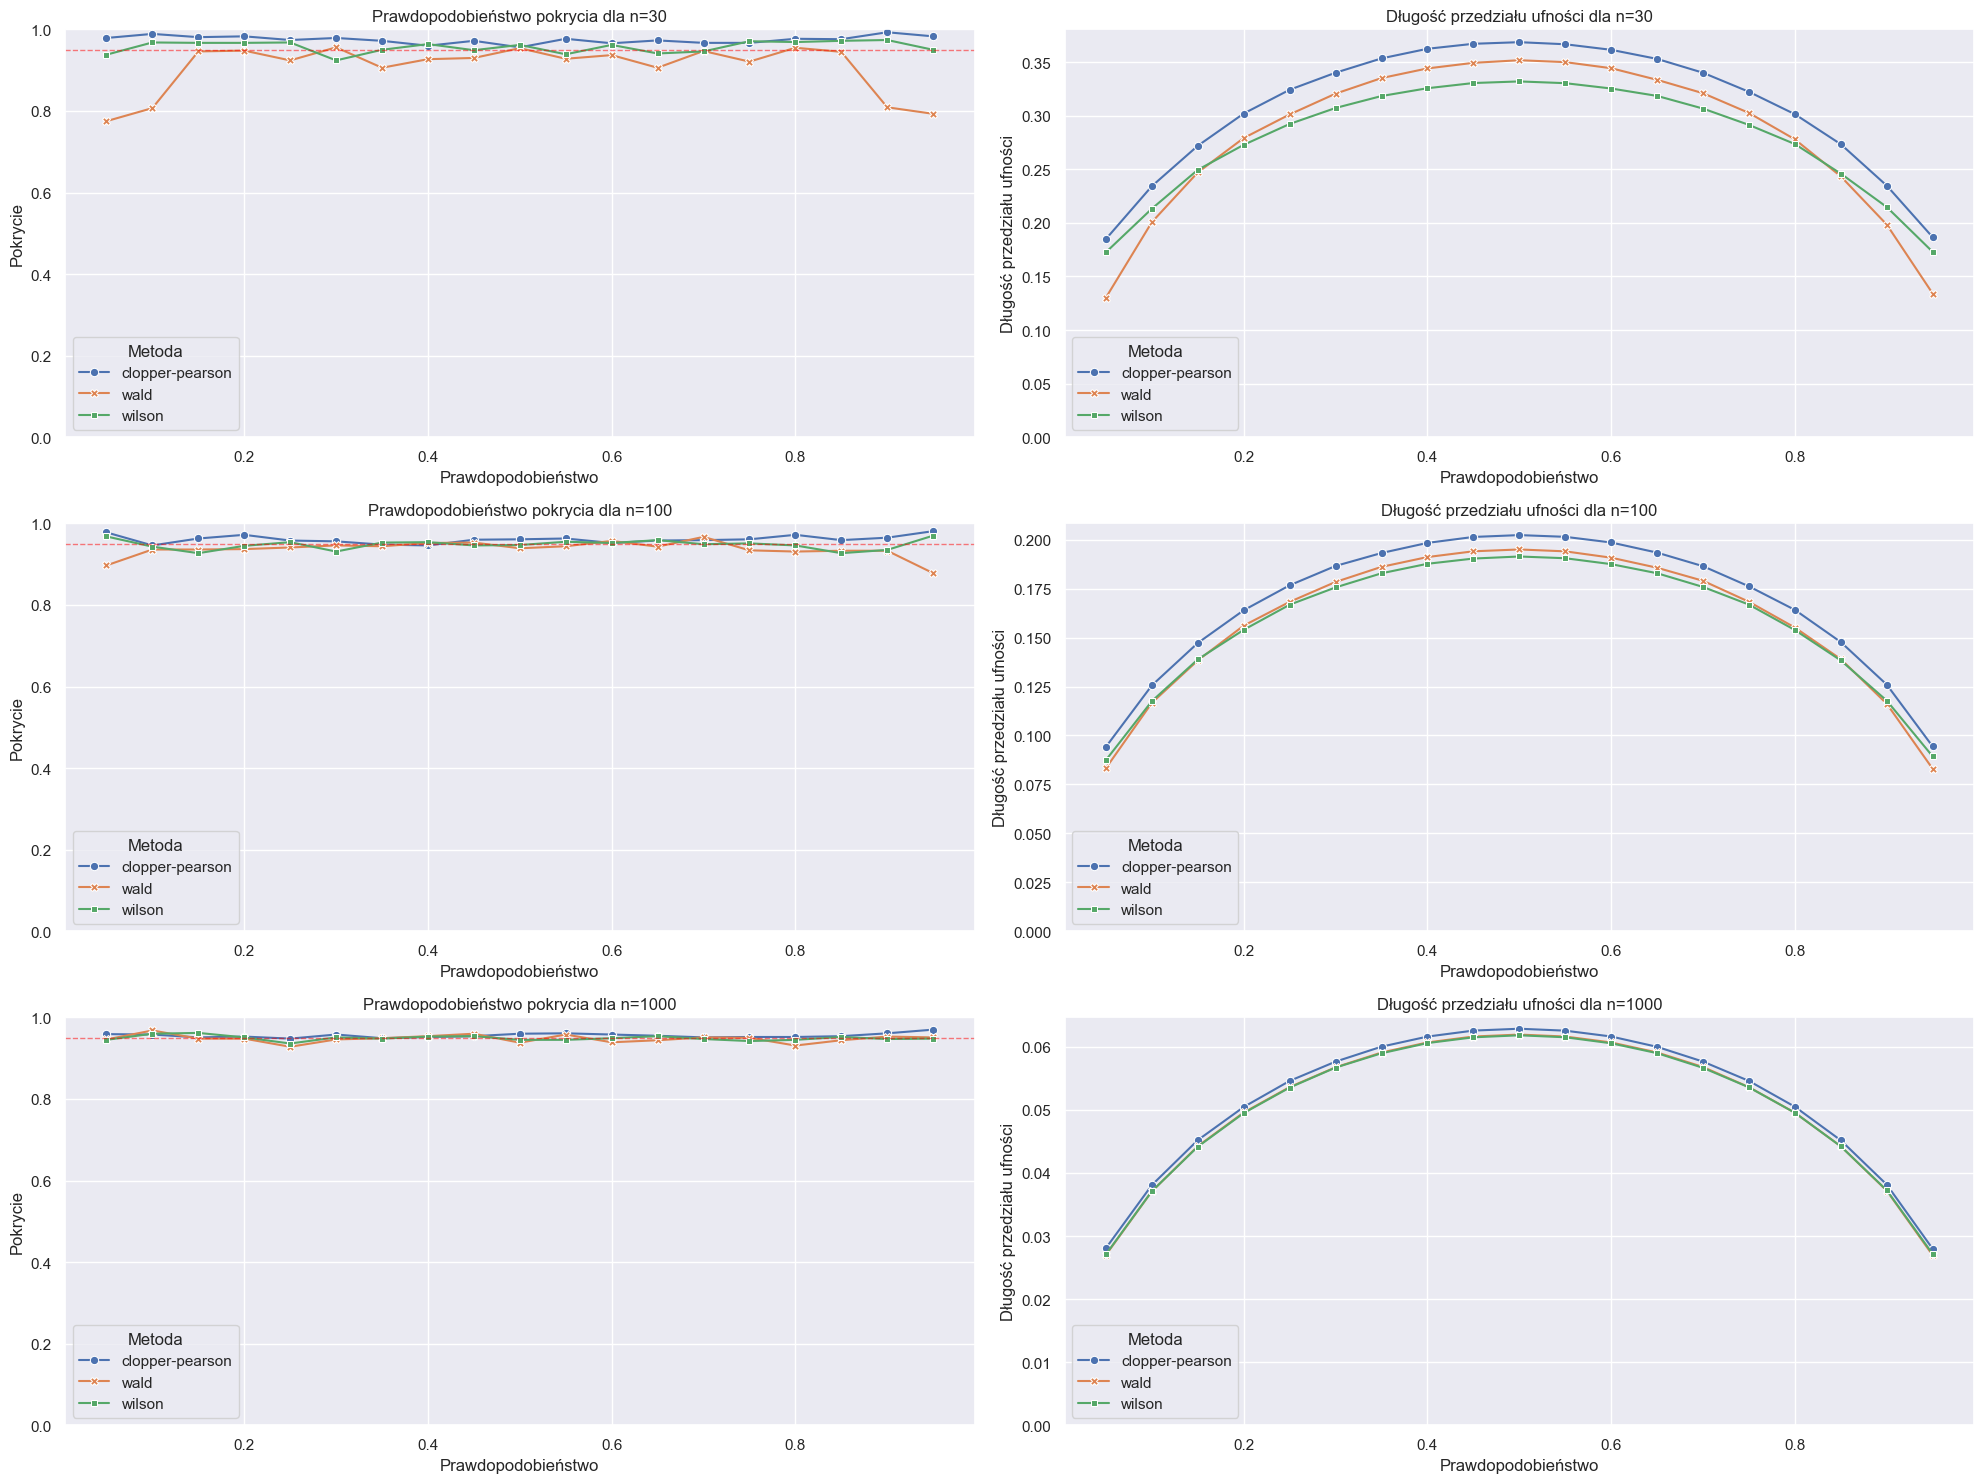

In [37]:
fig, axs = plt.subplots(len(n_sizes), 2, figsize=(20, 15))

for i, n in enumerate(n_sizes):
    subset = results_df[results_df['n'] == n]
    
    sns.lineplot(ax=axs[i, 0], data=subset, x='p', y='Pokrycie', hue='Metoda', style='Metoda', markers=True, dashes=False)
    axs[i, 0].axhline(0.95, color='red', linestyle='--', linewidth=1, alpha=0.5)
    axs[i, 0].set_title(f'Prawdopodobieństwo pokrycia dla n={n}')
    axs[i, 0].set_ylabel('Pokrycie')
    axs[i, 0].set_xlabel('Prawdopodobieństwo')
    axs[i, 0].set_ylim(0, 1)
    

    sns.lineplot(ax=axs[i, 1], data=subset, x='p', y='Długość', hue='Metoda', style='Metoda', markers=True, dashes=False)
    axs[i, 1].set_title(f'Długość przedziału ufności dla n={n}')
    axs[i, 1].set_ylabel('Długość przedziału ufności')
    axs[i, 1].set_xlabel('Prawdopodobieństwo')
    axs[i, 1].set_ylim(0, axs[i, 1].get_ylim()[1])

plt.tight_layout()
plt.show();

Widzimy, że:
- dla próby o rozmiarze $n = 30$ najlepiej działa przedział ufności Wilsona, który, jeśli chodzi o procent pokrycia, najstabilniej oscyluje wokół $0.95$. Najgorszym wyborem zdaje się być przedział Walda odnotowujący niski poziom pokrycia dla małych i dużych prawdopodobieństw,
- dla próby długości $100$ ciężko jest wybrać najlepszy z przedziałów, ale patrząc na procent pokrycia ponownie Wilson wydaje się być najbliższy poziomowi $0.95$,
- w przypadku $n = 1000$ równie ciężko wyłonić najlepszy przedział. Wciąż wydaje się, że najlepiej poziom istotności trzyma Wilson. Wald wypada tutaj zdecydowanie lepiej niż poprzednio, co oznacza, że powinno stosować się go dla dłuższych prób.

## Część V

### Zadanie 10

Zapoznaliśmy się.

### Zadanie 11

W tym zdaniu skupimy się na weryfikacji hipotez. Przyjmijmy poziom istotności $1- \alpha = 0.95$. Wykorzystamy do tego funkcję `binomtest` z biblioteki `scipy.stats` oraz `proportions_ztest`.

Funkcja `binomtest` jest to test hipotezy zerowej, że prawdopodobieństwo powodzenia eksperymentu Bernoulliego wynosi $p$. Funkcja przyjmuje argumentu takie jak:
- *k* - liczba sukcesów,
- *n* - liczba prób,
- *p* - prawdopodobieństwo sukcesu, domyślnie $0.5$,
- *alternative* - wskazuje hipotezę alternatywną, domyślnie *two-sided*.

Funkcja `proprotion_ztest` pozwala porównać dwie proporcje z prób i sprawdzić czy są takie same. Funkcja przyjmuje takie argumenty jak:
- *count* - liczba sukcesów w *nobs* próbach. Może być pojedynczą liczbą (dla jednej próby) lub tablicą (dla wielu niezależnych prób),
- *nobs* - liczba prób lub obserwacji, musi mieć taką samą długość jak *count*, jeśli jest podana jako tablica,
- *value* - wartość hipotezy zerowej dotycząca proporcji w przypadku testu jednopróbkowego, dla testu dwupróbkowego jest to różnica między proporcjami dwóch prób, które są porównywane, domyślnie *value* jest ustawione na $0$, co oznacza, że dla testu jednopróbkowego hipoteza zerowa zakłada proporcję równą *value*, a dla testu dwupróbkowego, że proporcje są równe.
- *alternative* - określa hipotezę alternatywną, domyślnie *two-sided*.

Przejdźmy do zadania.

$H_0$: Prawdopodobieństwo, że w firmie pracuje kobieta wynosi: $0.5$.

$H_1$: Prawdopodobieństwo, że w firmie pracuje kobieta jest różne od: $0.5$.

In [14]:
n=len(df)
k_1=len(df[df['PŁEĆ']=='K'])

result_1=binomtest(k_1, n, p=0.5)
result_1.pvalue

4.97297347921355e-05

Wynik to około $4.97 \cdot 10^{-5}$, jest to wartość mniejsza od poziomu istotności, zatem odrzucamy hipotezę zerową.

$H_0$: Prawdopodobieństwo, że pracownik jest zadowolony ze swojego wynagrodzenia w pierwszym badanym okresie jest większe bądź równe: $0.7$.

$H_1$: Prawdopodobieństwo, że pracownik jest zadowolony ze swojego wynagrodzenia w pierwszym badanym okresie jest mniejsze od: $0.7$.

In [19]:
k_2=len(df[df['CZY_ZADOW']=='TAK'])
result_2=binomtest(k_2, n, p=0.7, alternative='less')
result_2.pvalue

3.212876740960112e-07

Wynik to około $3.12 \cdot 10^{-7}$, jest to wartość mniejsza od poziomu istotności, zatem ponownie odrzucamy hipotezę zerową.

$H_0$: Prawdopodobieństwo, że kobieta pracuje na stanowisku menadżerskim jest równe prawdopodobieństwu, że mężczyzna pracuje na stanowisku menadżerskim.

$H_1$: Prawdopodobieństwo, że kobieta pracuje na stanowisku menadżerskim jest różne od prawdopodobieństwa, że mężczyzna pracuje na stanowisku menadżerskim.

In [32]:
k_czy_kier=len(df[(df['CZY_KIER']=='Tak') & (df['PŁEĆ']=='K')])
m_czy_kier=len(df[(df['CZY_KIER']=='Tak') & (df['PŁEĆ']=='M')])

n1=len(df[df['PŁEĆ']=='K'])
n2=len(df[df['PŁEĆ']=='M'])

count1=np.array([k_czy_kier, m_czy_kier])
nobs1=np.array([n1, n2])

z, p = proportions_ztest(count1, nobs1)
p

0.49309035250452393

Wynik to około $0.493$, jest to wartość większa od poziomu istotności, zatem nie mamy podstaw do odrzucenia hipotezy zerowej.

$H_0$: Prawdpodobieństwo, że kobieta jest zadowolona ze swojego wynagrodzenia w pierwszym badanym okresie jest równe prawdopodobieństwo, że mężczyzna jest zadowolony ze swojego wynagrodzenia w pierwszym badanym okresie.

$H_1$: Prawdopodobieństwo, że kobieta jest zadowolona ze swojego wynagrodzenia w pierwszym badanym okresie jest różne od prawdopodobieństwa, że mężczyzna jest zadowolony ze swojego wynagrodzenia w pierwszym badanym okresie.


In [34]:
k_zadow=len(df[(df['CZY_ZADOW']=='TAK') & (df['PŁEĆ']=='K')])
m_zadow=len(df[(df['CZY_ZADOW']=='TAK') & (df['PŁEĆ']=='M')])

count2=np.array([k_zadow, m_zadow])
nobs2=nobs1

z, p = proportions_ztest(count2, nobs2)
p

0.6293763135675485

Wynik to około $0.623$, jest to wartość większa od poziomu istotności, zatem nie mamy podstaw do odrzucenia hipotezy zerowej.

$H_0$: Prawdopodobieństwo, że kobieta pracuje w dziale obsługi kadrowo-płacowej jest większe lub równe prawdopodobieństwu, że mężczyzna pracuje w dziale obsługi kadrowo-płacowej.

$H_1$: Prawdopodobieństwo, że kobieta pracuje w dziale obsługi kadrowo-płacowej jest mniejsze od prawdopodobieństwa, że mężczyzna pracuje w dziale obsługi kadrowo-płacowej.

In [35]:
k_hr=len(df[(df['DZIAŁ']=='HR') & (df['PŁEĆ']=='K')])
m_hr=len(df[(df['DZIAŁ']=='HR') & (df['PŁEĆ']=='M')])

count3=np.array([k_hr, m_hr])
nobs3=nobs1

z, p = proportions_ztest(count3, nobs3, alternative='smaller')
p

0.00211649579963765

Wynik to około $0.002$, jest to wartość mniejsza od poziomu istotności, zatem odrzucamy hipotezę zerową na rzecz hipotezy alternatywnej.

### Zadanie 12


W zadaniu 12 wyznaczymy symulacyjnie moc testu dokładnego `binom` oraz moc testu asymptotycznego `proportion_ztest` z poprawką i bez poprawki. Zadanie rozpatrzymy dla:
$$n=30,100,1000$$
$$1-\alpha=0.95$$
$$H_0: p=0.9$$
$$H_1: p \neq 0.9$$

In [8]:
def calculate_power(H_0, alpha, n, p, M):
    """
    Oblicza moc testu binomialnego oraz dwóch wersji testu z-proporcji dla szeregu prawdopodobieństw.

    Parametry:
    H_0 : float
        Hipoteza zerowa dotycząca prawdopodobieństwa sukcesu.
    alpha : float
        Poziom istotności użyty w testach.
    n : int
        Rozmiar próby dla każdej symulacji.
    p : list of float
        Lista prawdopodobieństw pod hipotezą alternatywną, dla których obliczana jest moc.
    M : int
        Liczba symulacji przeprowadzanych dla każdego prawdopodobieństwa w `p`.

    Zwraca:
    dict
        Słownik zawierający listę prawdopodobieństw `p` oraz trzy listy wyników reprezentujące moc testów:
        'result_binom' dla testu binomialnego,
        'result_prop_1' dla testu z-proporcji z poprawką,
        'result_prop_2' dla testu z-proporcji bez poprawki.
    """
    size = len(p)
    
    result_binom = np.zeros(size)
    result_prop_1 = np.zeros(size)
    result_prop_2 = np.zeros(size)
    
    for k in range(size):
        rejection_binom = 0
        rejection_prop_1 = 0
        rejection_prop_2 = 0
        
        for _ in range(M):
            sample_binom = np.random.binomial(n, p[k], 1)
            summ = np.sum(sample_binom)
            
            binom_pv = binomtest(summ, n, p=H_0, alternative='two-sided').pvalue
            if binom_pv < alpha:
                rejection_binom += 1
            
            prop_pv_1 = proportions_ztest(summ, n, value=H_0, alternative='two-sided')[1]
            if prop_pv_1 < alpha:
                rejection_prop_1 += 1
            
            prop_pv_2 = proportions_ztest(summ, n, value=H_0, alternative='two-sided', prop_var=False)[1]
            if prop_pv_2 < alpha:
                rejection_prop_2 += 1
            
        result_binom[k] = rejection_binom / M
        result_prop_1[k] = rejection_prop_1 / M
        result_prop_2[k] = rejection_prop_2 / M
    
    return {
        'p': p,
        'result_binom': result_binom,
        'result_prop_1': result_prop_1,
        'result_prop_2': result_prop_2
    }

In [24]:
H_0 = 0.9
alpha = 0.05
p = np.linspace(0, 1, 100)
M = 1000

In [18]:
results = calculate_power(H_0, alpha, 30, p, M)
df = pd.DataFrame(results)

c:\Users\jakub\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\weightstats.py:792: RuntimeWarning: divide by zero encountered in scalar divide
  zstat = value / std


In [40]:
results2 = calculate_power(H_0, alpha, 100, p, M)
df2 = pd.DataFrame(results2)

c:\Users\jakub\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\weightstats.py:792: RuntimeWarning: divide by zero encountered in scalar divide
  zstat = value / std


In [41]:
results3 = calculate_power(H_0, alpha, 1000, p, M)
df3 = pd.DataFrame(results3)

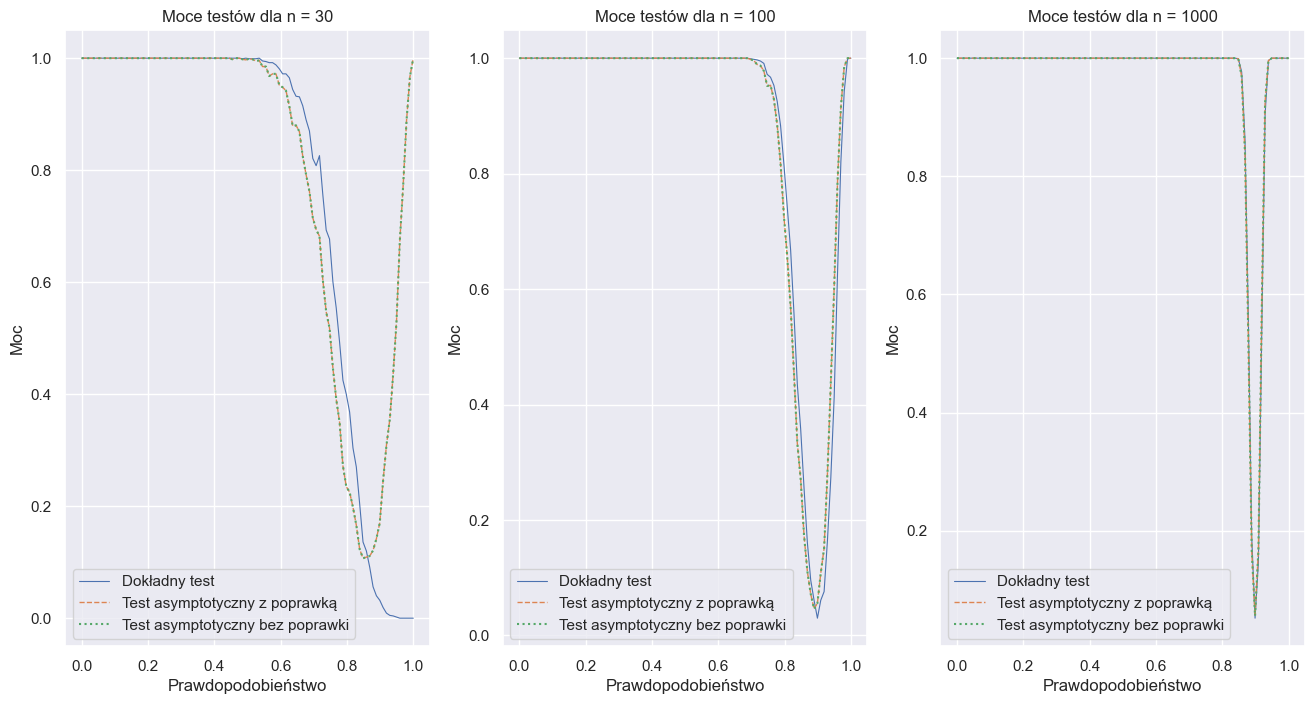

In [48]:
fig, ax = plt.subplots(figsize=(16,8), ncols=3, nrows=1)
sns.lineplot(x=p, y='result_binom', data=df, label='Dokładny test', linewidth=0.8, ax=ax[0])
sns.lineplot(x=p, y='result_prop_1', data=df, label='Test asymptotyczny z poprawką', linestyle='--', linewidth=1, ax=ax[0])
sns.lineplot(x=p, y='result_prop_2', data=df, label='Test asymptotyczny bez poprawki', linestyle=':', linewidth=1.5, ax=ax[0])
ax[0].set_title('Moce testów dla n = 30')
ax[0].set_xlabel('Prawdopodobieństwo')
ax[0].set_ylabel('Moc')

sns.lineplot(x=p, y='result_binom', data=df2, label='Dokładny test', linewidth=0.8, ax=ax[1])
sns.lineplot(x=p, y='result_prop_1', data=df2, label='Test asymptotyczny z poprawką', linestyle='--', linewidth=1, ax=ax[1])
sns.lineplot(x=p, y='result_prop_2', data=df2, label='Test asymptotyczny bez poprawki', linestyle=':', linewidth=1.5, ax=ax[1])
ax[1].set_title('Moce testów dla n = 100')
ax[1].set_xlabel('Prawdopodobieństwo')
ax[1].set_ylabel('Moc')

sns.lineplot(x=p, y='result_binom', data=df3, label='Dokładny test', linewidth=0.8, ax=ax[2])
sns.lineplot(x=p, y='result_prop_1', data=df3, label='Test asymptotyczny z poprawką', linestyle='--', linewidth=1, ax=ax[2])
sns.lineplot(x=p, y='result_prop_2', data=df3, label='Test asymptotyczny bez poprawki', linestyle=':', linewidth=1.5, ax=ax[2])
ax[2].set_title('Moce testów dla n = 1000')
ax[2].set_xlabel('Prawdopodobieństwo')
ax[2].set_ylabel('Moc')
plt.grid(True)

Możemy zaobserwować, że:
- im większa próbka tym moce testów są bardziej zbliżone,
- dla $n=30$ dokładny test ma większą moc niż testy asymptotyczne, prawie na całym przedziale,
- dla $n=100$ dokładny test ma większa moc do $p=0.9$ niż testy asymptotyczne, następnie mniejszą,
- dla $n=1000$ różnice nie są już zauważalne.

## Zadanie dodatkowe

Aby wyznaczyć asymptotyczne przedziały ufności dla prawdopodobieństwa sukcesu $p$ w modelu binarnym, możemy zastosować przekształcenie logit, które jest zdefiniowane jako logarytm szansy, czyli:

$$ logit(p) = \log \left( \frac{p}{1-p} \right) $$

Przy użyciu metody delta możemy oszacować wariancję tej transformacji, a następnie przekształcić ją z powrotem, aby uzyskać przedziały ufności dla $p$.

Rozważmy, że mamy próbkę z $n$ niezależnymi próbami Bernoulliego, gdzie $X$ oznacza liczbę sukcesów, a $p$ jest prawdopodobieństwem sukcesu. Załóżmy, że:

$$ \hat{p} = \frac{X}{n} $$

wtedy:

$$ \text{Var}(logit(\hat{p})) \approx (\frac{\partial logit(\hat{p})}{\partial \hat{p}})^2\text{Var}(\hat{p}) $$

$$ \text{Var}(logit(\hat{p})) \approx (\frac{1}{\hat{p}(1-\hat{p})})^2 \cdot \frac{\hat{p}(1-\hat{p})}{n} = \frac{1}{n\hat{p}(1-\hat{p})} $$

Zatem asymptotyczne $95\%$ przedziału ufności dla $logit(\hat{p})$ to 

$$ logit(\hat{p}) \pm 1.96 \sqrt{\frac{1}{n\hat{p}(1-\hat{p})}} $$

Te wartości można następnie przekształcić z powrotem na skale prawdopodobieństwa za pomocą funkcji odwrotnej do logitu i otrzymać:

$$p=\frac{1}{1+\exp(-logit(p))}$$

Zaimplementujmy to w Python.

In [36]:
def logit_confidence_interval(x, n, alpha=0.05):
    """
    Oblicza przedział ufności dla proporcji, używając transformacji logitowej.

    Funkcja ta szacuje przedział ufności proporcji na podstawie transformacji logit (logarytm szans),
    która jest przydatna przy proporcjach bliskich 0 lub 1. Transformacja ta pomaga ustabilizować
    wariancję i sprawia, że przedział jest bardziej symetryczny.

    Parametry:
    - x (int): liczba sukcesów w próbce.
    - n (int): całkowita liczba prób lub obserwacji w próbce.
    - alpha (float, opcjonalnie): poziom istotności używany do określenia przedziału ufności.
      Domyślnie wynosi 0.05, co odpowiada 95% przedziałowi ufności.

    Zwraca:
    - tuple: krotka zawierająca dolną i górną granicę przedziału ufności dla proporcji,
      po przekształceniu z powrotem z skali logit na skalę prawdopodobieństwa.
    """
    
    p_hat = x/n
    logit_p = np.log(p_hat/(1 - p_hat))
    se_logit = np.sqrt(1/(n * p_hat * (1 - p_hat)))
    z = scipy.stats.norm.ppf(1 - alpha/2)
    ci_lower_logit = logit_p - z*se_logit
    ci_upper_logit = logit_p + z*se_logit
    ci_lower = 1/(1 + np.exp(-ci_lower_logit))
    ci_upper = 1/(1 + np.exp(-ci_upper_logit))
    
    return ci_lower, ci_upper

In [37]:
x=50
n_dodatkowe=100
alpha=0.05

logit_ci=logit_confidence_interval(x, n, alpha)
default_ci=proportion_confint(x, n, alpha=alpha, method='normal')

logit_ci, default_ci

((0.19486968909503338, 0.3146321526989706),
 (0.18998860404555862, 0.3100113959544414))

Wyniki są bardzo zbliżone.